# Imagery and Segmentation
We recommend using ImageryClient to download imagery and segmentation data. ImageryClient makes core use of CloudVolume, but adds convenience and better integration with the CAVEclient.

You can install ImageryClient with `pip install imageryclient`.

ImageryClient is designed to download aligned blocks of imagery and segmentation data, as well as has some convenience functions for creating overlays of the two. Imagery is downloaded as blocks of 8-bit values (0-255) that indicate grayscale intensity, while segmentation is downloaded as blocks of 64-bit integers that describe the segmentation ID of each voxel. Alternatively, segmentation can be kept as a dictionary of boolean masks, where each key is a root ID and each value is a boolean mask of the same shape as the imagery.

Detailed information on the options can be found in the documentation. A typical example would be to use ImageryClient to download and visualize a 512x512 pixel cutout of imagery and segmentation centered on a specific location based on the coordinates in Neuroglancer:

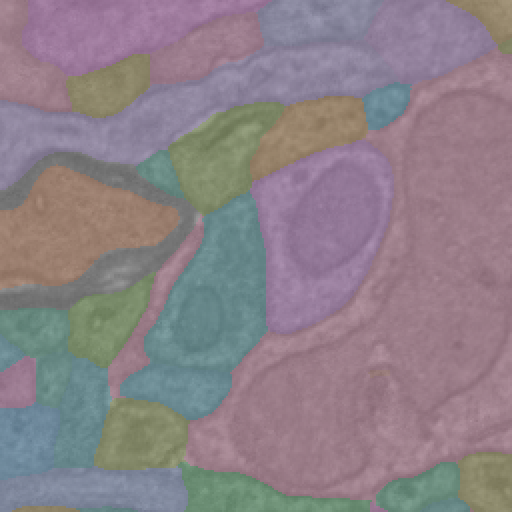

In [14]:
import os
import imageryclient as ic
from caveclient import CAVEclient

client = CAVEclient('minnie65_public')

img_client = ic.ImageryClient(client=client)

ctr = [240640, 207872, 21360]

image, segs = img_client.image_and_segmentation_cutout(ctr,
                                                       split_segmentations=True,
                                                       bbox_size=(512, 512),
                                                       scale_to_bounds=True,
)

ic.composite_overlay(segs, imagery=image, palette='husl').convert("RGB")
# Note: the final `.convert('RGB')` is needed to build this documetnation, but is not required to run locally.

# Task 1 

- pick a cell of interest and query the synapse table for all of its downstream partners
- choose a synapse and save its center point position
- now visualize a cutout of the segmentation and the imagery

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from caveclient import CAVEclient

### Pick a cell

In [3]:
datastack_name = 'minnie65_public'
client = CAVEclient(datastack_name)

### Query the synapse table and pick a synapse

### Create your imagery client

### Visualize your cutout

#### Bonus Task: Can you create a grid of cutout visualizations, one for each slice of the data?

<h3>Save Images</h3>

This function will save a series of PNG images that are exactly the same size
so you can easily combine them as layers in Illustrator or photoshop
to make a publication quality figures

In [23]:
ic.save_image_and_segmentation_masks('synapse_test', bounds=bounds,
                                     root_ids = [pre_id, post_id],
                                     segmentation_colormap={pre_id:[255, 0,0,255], 
                                                            post_id:[0, 255, 0 ,255]})